<a href="https://colab.research.google.com/github/ricardorocha86/Topicos-A/blob/main/Script_Redes_Neurais_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KERAS**

In [ ]:
# mlp for the circles problem with cross entropy loss
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping   
from keras.utils import plot_model 
from matplotlib import pyplot as plt
import numpy as np

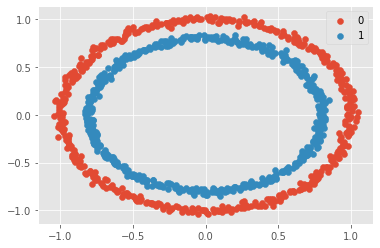

In [ ]:
# GERAÇÃO DE DADOS ARTIFICIAIS

X, y = make_circles(n_samples = 1000, noise = 0.02, random_state = 1)

for i in range(2):
	estrato = np.where(y == i)
	plt.scatter(X[estrato, 0], X[estrato, 1], label = str(i))
plt.legend()
plt.show()

In [ ]:
# DIVISÃO EM TESTE E TREINAMENTO
ntreino = 500

Xtreino, Xteste = X[:ntreino, :], X[ntreino:, :]
ytreino, yteste = y[:ntreino], y[ntreino:]

In [ ]:
# FUNÇÕES DE ATIVAÇÕES NO KERAS: 'relu', 'sigmoid', 'softmax', 'tanh', 'selu, 'elu' 

In [ ]:
# DEFININDO A ARQUITETURA DA REDE NEURAL

modelo = Sequential()

modelo.add(Dense(5, input_dim = 2, activation = 'tanh')) 
modelo.add(Dense(5, activation = 'sigmoid')) 
modelo.add(Dense(1, activation = 'sigmoid'))   

alg = Adam(learning_rate = 0.01)

modelo.compile(loss = 'binary_crossentropy', optimizer = alg, metrics = ['accuracy'])

In [ ]:
print(modelo.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_47 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# AJUSTE DO MODELO
import time
start = time.time() 


parada = EarlyStopping(monitor = 'loss', patience = 10)

treinamento = modelo.fit(Xtreino, ytreino, validation_data = (Xteste, yteste), 
                     epochs = 1000, verbose = 1, batch_size = 32, callbacks = parada)


end = time.time()
print(end - start)

Epoch 1/1000
16/16 [==============================] - 0s 10ms/step - loss: 0.7078 - accuracy: 0.4520 - val_loss: 0.6962 - val_accuracy: 0.4680
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4960 - val_loss: 0.6942 - val_accuracy: 0.5140
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5080 - val_loss: 0.6959 - val_accuracy: 0.4660
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5420 - val_loss: 0.6963 - val_accuracy: 0.4560
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5340 - val_loss: 0.6975 - val_accuracy: 0.4580
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5380 - val_loss: 0.6973 - val_accuracy: 0.4880
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5340 - val_loss: 0.6973 - val_accuracy: 0.4580
Epoch

In [ ]:

# evaluate the model
_, acc_treino = modelo.evaluate(Xtreino, ytreino, verbose = 0)
_, acc_teste = modelo.evaluate(Xteste, yteste, verbose = 0)
print('Performance: Treino: {:.3f}, Teste: {:.3f}'.format(acc_treino, acc_teste))


Performance: Treino: 1.000, Teste: 1.000


In [ ]:
modelo.metrics_names 

['loss', 'accuracy']

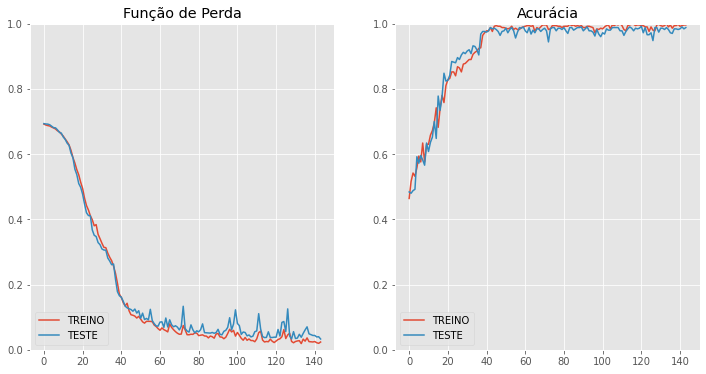

In [ ]:
# GRÁFICOS DO TREINAMENTO

plt.figure(figsize = (12, 6))
plt.style.use('ggplot')

plt.subplot(121)
plt.title('Função de Perda')
plt.plot(treinamento.history['loss'], label='TREINO')
plt.plot(treinamento.history['val_loss'], label='TESTE')
plt.ylim(0, 1)
plt.legend(loc = 'lower left') 

# plot accuracy during training
plt.subplot(122)
plt.title('Acurácia')
plt.plot(treinamento.history['accuracy'], label='TREINO')
plt.plot(treinamento.history['val_accuracy'], label='TESTE')
plt.ylim(0, 1)
plt.legend(loc = 'lower left')

plt.show()
 
 

## **Trabalho para Entregar**

- Deve ser feito individual ou em duplas.

- O trabalho consiste de fazer experimentos com redes neurais utilizando Keras.
Vocês deve utilizar um conjunto de dados com pelo menos 2000 linhas e 10 variáveis. O conjunto deve conter uma variável resposta em que se deseja fazer previsões. 

- Cada grupo deve trabalhar com um conjunto de dados diferente, portanto, assim que definirem o conjunto, enviar para eu ver e dar um ok. 

- No trabalho, vocês devem procurar pela melhor arquitetura para o problema, isto é, a rede que minimiza a métrica alvo no menor tempo de treinamento possível. 

- Na arquitetura, vocês devem comparar modelos com 1 e 2 camadas ocultas. Verifique a melhor quantidade de neurônios para cada camada. 
Verifique também quais são as melhores função de ligação para se utilizar em cada camada.

- Conclua seu trabalho apresentando qual é a arquitetura que deve ser utilizada no problema em questão. 

- Organize o seu experimento e relate todos os passos tomados. Descreva os insights obtidos pelos resultados. Conte a história de tudo o que você fez para chegar na sua resposta.

- O trabalho deve ser feito no formato ipynb e pode ser entregue através de um link do github. 

**O prazo de entrega do trabalho é até: 11/11/2020**

---

---

---

## **Redes Neurais Convolucionais**

In [ ]:
# BIBLIOTECAS DE INTERESSE
import numpy as np  
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# CARREGANDO OS DADOS MNIST
(img_treino, y_treino), (img_teste, y_teste) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(img_treino.shape)
print(y_treino.shape)
print(img_teste.shape)
print(y_teste.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
28*28

784

## Rede Neural simples nos dados MNIST


In [ ]:
# NORMALIZAR OS VALORES DOS PIXELS
Xtreino = (img_treino / 255) - 0.5
Xteste = (img_teste / 255) - 0.5

# TRANSFORMAR NUM VETOR DE DIMENSAO 1
Xtreino = Xtreino.reshape((-1, 784))
Xteste = Xteste.reshape((-1, 784))

# ARQUITETURA DA REDE
ann = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# SETUP DA REDE
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TREINAMENTO DA REDE
ann.fit(Xtreino, to_categorical(y_treino), epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3486 - accuracy: 0.8951
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1750 - accuracy: 0.9466
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1357 - accuracy: 0.9575
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1165 - accuracy: 0.9635
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1019 - accuracy: 0.9678
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0897 - accuracy: 0.9717
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0818 - accuracy: 0.9738
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0747 - accuracy: 0.9757
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0692 - accuracy: 0.9780
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.062

In [ ]:
# PERFORMANCE DO MODELO NOS DADOS DE TESTE
ann.evaluate(Xteste, to_categorical(y_teste)) 

313/313 [==============================] - 0s 906us/step - loss: 0.0968 - accuracy: 0.9717


[0.09684669971466064, 0.9717000126838684]

---

## Rede Neural Convolucional nos dados MNIST
  

In [ ]:
# DEIXANDO AS VARIÁVEIS NA ESCALA 0-1
Xtreino = img_treino.astype("float32") / 255
Xteste = img_teste.astype("float32") / 255

# DEIXANDO NO SHAPE ADEQUADO: (28, 28, 1)
Xtreino = np.expand_dims(Xtreino, -1)
Xteste = np.expand_dims(Xteste, -1) 

# CONVERTENDO A VARIÁVEL RESPOSTA EM VARIÁVEIS DUMMYS DE CADA CATEGORIA
# (É UM PADRÃO DO KERAS PARA USO DE CNN MULTICLASSE)
ytreino = keras.utils.to_categorical(y_treino, 10)
yteste = keras.utils.to_categorical(y_teste, 10)

#DEFININDO A ARQUITETURA DA CNN
cnn = keras.Sequential(
    [
        keras.Input(shape = (28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

cnn.summary()
 
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

cnn.fit(Xtreino, ytreino, batch_size = 128, epochs = 10)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [ ]:
# PERFORMANCE DO MODELO
cnn.evaluate(Xteste, yteste, verbose=0) 

[0.02886911854147911, 0.9904000163078308]

--- 

## **TRABALHO:** Faça uma comparação de aplicação entre redes neurais tradicionais e redes neurais convolucionais em um dos conjuntos de dados a seguir:

- MNIST
- [FASHION MNIST](https://www.kaggle.com/zalando-research/fashionmnist) (10 classes na variável resposta, imagens pequenas)
- [CIFAR10](https://www.kaggle.com/c/cifar-10/overview) (10 classes na variável resposta, imagens médias)
- [DOG vs CAT](https://www.kaggle.com/c/dogs-vs-cats/data) (2 classes na variável resposta, imagens mais pesadas)

## Procure por arquiteturas que alcancem as melhores performances, documente seus experimentos, justifique suas escolhas e discuta os resultados obtidos. 

## Faça o trabalho para ser um projeto do seu portfólio. Descreva, de forma resumida, a história do trabalho. Não é para ser um trabalho extenso, mas sim conciso. O objetivo é comparar uma rede tradicional, com a abordagem via CNN, em algum dos conjuntos de dados listados. Utilize referências que ajudem a chegar em resultados melhores e resuma seus experimentos num relatório.

## Data de entrega: **21/12**.